In [1]:
!mkdir ../aim2/output_week
!unzip ../dataset.zip

mkdir: cannot create directory '../aim2/output_week': File exists


In [2]:
!mkdir ../kaggle
!mkdir ../kaggle/input
!cp ../dataset/*.csv ../kaggle/input/


In [7]:
import pandas as pd
import datetime
import numpy as np


In [8]:
PATH_STATION_HOUR = "../kaggle/input/station_hour.csv"
PATH_STATION_DAY = "../kaggle/input/station_day.csv"
PATH_CITY_HOUR = "../kaggle/input/city_hour.csv"
PATH_CITY_DAY = "../kaggle/input/city_day.csv"
PATH_STATIONS = "../kaggle/input/stations.csv"


In [9]:
df = pd.read_csv(PATH_STATION_HOUR)
df1 = pd.read_csv(PATH_STATION_DAY)
df2 = pd.read_csv(PATH_CITY_HOUR)
df3 = pd.read_csv(PATH_CITY_DAY,parse_dates=['Date'])
df4 = pd.read_csv(PATH_STATIONS)
df5 = pd.read_csv('../aim2/aim2_data/city_day.csv',parse_dates=['Date'])
df6 = pd.read_csv('../aim2/aim2_data/new_city_day.csv',parse_dates=['Date'])

/snap/jupyter/6/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (15) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


**Pre-Lockdown Aim 2 code**

In [9]:
#Here we are  finding the average AQI values per week for 4 months before lockdown
list_cities =['Guwahati', 'Delhi', 'Kolkata','Ahmedabad','Brajrajnagar','Bengaluru',
               'Patna','Jorapokhar','Amaravati','Visakhapatnam','Coimbatore','Mumbai',
               'Talcher','Thiruvananthapuram','Chennai','Hyderabad','Jaipur','Lucknow',
               'Amritsar','Gurugram','Ujjain','Pithampur'] 

for city_name in list_cities:
  
  if city_name not in ['Ujjain','Pithampur']:
    temp = df3[df3['City'].isin([city_name])]
    temp1 = df5[df5['City'].isin([city_name])]
  else:
    temp = df6[df6['City'].isin([city_name])]
    temp1 = df6[df6['City'].isin([city_name])]
  
  #guwahati_2019 = []
  da = datetime.datetime(2019,11,1) #Start date of the 4 months considered before lockdown
  da1 = datetime.datetime(2020,3,20) #End date of the 4 months considered before lockdown
  #check_da = datetime.datetime(2020,1,24)
  avg_Aqi = []
  count1=0
  while da<da1:
    aqi_temp=0
    count=0
    for j in range(7): #Taking sum of all the AQI value of a particular week
      xyz = temp.loc[(temp.Date.dt.day==da.day) & (temp.Date.dt.month==da.month) & (temp.Date.dt.year==da.year)]
      xyz1 = temp1.loc[(temp1.Date.dt.day==da.day) & (temp1.Date.dt.month==da.month) & (temp1.Date.dt.year==da.year)]
      
      check_val=0
      for x in xyz['AQI']:
        if x > 0:
          aqi_temp+=x
          check_val = x
          count+=1
      
      if check_val==0:
        for x in xyz1['AQI']:
          if x > 0:
            aqi_temp+=x
            count+=1
          else:
            count1+=1
      
      da = da+datetime.timedelta(days=1)
    if count >=4: #Taking average of the AQI values of a particular week only if
                  #for a week there are more than 3 AQI values available
      avg_Aqi.append(aqi_temp/count)
    else:
      avg_Aqi.append(np.NaN) #Set the AQI value for that week NULL if not more than 3
                            # AQI values are available


  
  ans = []
  for i in range(len(avg_Aqi)):
    ans.append([i+1,avg_Aqi[i]])

  f = open('../aim2/output_week/{}_prior_lockdown.csv'.format(city_name),'w') 

  for i in ans:
    f.write(str(i[0])+","+str(i[1])+"\n") #Generating the output file for an individual city

  f.close()



**During Lockdown Aim 2 code**

In [10]:
#Here we are  finding the average AQI values per week for during the  lockdown period
list_cities =['Guwahati', 'Delhi', 'Kolkata','Ahmedabad','Brajrajnagar','Bengaluru',
               'Patna','Jorapokhar','Amaravati','Visakhapatnam','Coimbatore','Mumbai',
               'Talcher','Thiruvananthapuram','Chennai','Hyderabad','Jaipur','Lucknow',
               'Amritsar','Gurugram','Ujjain','Pithampur'] 


for city_name in list_cities:

  if city_name not in ['Ujjain','Pithampur']:
    temp = df3[df3['City'].isin([city_name])]
    temp1 = df5[df5['City'].isin([city_name])]
  else:
    temp = df6[df6['City'].isin([city_name])]
    temp1 = df6[df6['City'].isin([city_name])]

  da = datetime.datetime(2020,3,23) # Start date of the lockdown period
  da1 = datetime.datetime(2020,6,1) #End date of the lockdown period

  avg_Aqi = []
  count1=0
  while da<da1:
    aqi_temp=0
    count=0
    for j in range(7): #Taking sum of all the AQI value of a particular week
      xyz = temp.loc[(temp.Date.dt.day==da.day) & (temp.Date.dt.month==da.month) & (temp.Date.dt.year==da.year)]
      xyz1 = temp1.loc[(temp1.Date.dt.day==da.day) & (temp1.Date.dt.month==da.month) & (temp1.Date.dt.year==da.year)]
      
      check_val=0
      for x in xyz['AQI']:
        if x > 0:
          aqi_temp+=x
          check_val = x
          count+=1
      
      if check_val==0:
        for x in xyz1['AQI']:
          if x > 0:
            aqi_temp+=x
            count+=1
          else:
            count1+=1
      
      da = da+datetime.timedelta(days=1)
    if count >=4: #Taking average of the AQI values of a particular week only if
                  #for a week there are more than 3 AQI values available
      avg_Aqi.append(aqi_temp/count)
    else:
      avg_Aqi.append(np.NaN) #Set the AQI value for that week NULL if not more than 3
                            # AQI values are available

  #xyz = temp.loc[(temp.Date.dt.day==da.day) & (temp.Date.dt.month==da.month) & (temp.Date.dt.year==da.year)]
  ans = []
  for i in range(len(avg_Aqi)):
    ans.append([i+1,avg_Aqi[i]])

  f = open('../aim2/output_week/{}_in_lockdown.csv'.format(city_name),'w')

  for i in ans:
    f.write(str(i[0])+","+str(i[1])+"\n") #Generating the output file for an individual city

  f.close()





**After Lockdown Aim 3 code**

In [11]:
#Here we are  finding the average AQI values per week for 4 months after lockdown
list_cities =['Guwahati', 'Delhi', 'Kolkata','Ahmedabad','Brajrajnagar','Bengaluru',
               'Patna','Jorapokhar','Amaravati','Visakhapatnam','Coimbatore','Mumbai',
               'Talcher','Thiruvananthapuram','Chennai','Hyderabad','Jaipur','Lucknow',
               'Amritsar','Gurugram','Ujjain','Pithampur'] 


for city_name in list_cities:

  if city_name not in ['Ujjain','Pithampur']:
    temp = df3[df3['City'].isin([city_name])]
    temp1 = df5[df5['City'].isin([city_name])]
  else:
    temp = df6[df6['City'].isin([city_name])]
    temp1 = df6[df6['City'].isin([city_name])]
  
  da = datetime.datetime(2020,6,1)#Start date of after lockdown period
  da1 = datetime.datetime(2020,7,1)
  da2 = datetime.datetime(2020,9,30)#End date of 4 months after lockdown period 

  avg_Aqi = []
  count1=0
  while da<da2:
    aqi_temp=0
    count=0
    for j in range(7): #Taking sum of all the AQI value of a particular week
      if da<=da1:
        xyz = temp.loc[(temp.Date.dt.day==da.day) & (temp.Date.dt.month==da.month) & (temp.Date.dt.year==da.year)]
      else:
        xyz = temp1.loc[(temp1.Date.dt.day==da.day) & (temp1.Date.dt.month==da.month) & (temp1.Date.dt.year==da.year)]    
      
      check_val=0
      for x in xyz['AQI']:
        if x > 0:
          aqi_temp+=x
          check_val=x
          count+=1
      
      if check_val==0 and da<=da1:
        xyz = temp1.loc[(temp1.Date.dt.day==da.day) & (temp1.Date.dt.month==da.month) & (temp1.Date.dt.year==da.year)]
        for x in xyz['AQI']:
          if x > 0:
            aqi_temp+=x
            count+=1
          else:
            count1+=1
      else:
        count1+=1
       
      da = da+datetime.timedelta(days=1)
    if count >=4: #Taking average of the AQI values of a particular week only if
                  #for a week there are more than 3 AQI values available
      avg_Aqi.append(aqi_temp/count)
    else:
      avg_Aqi.append(np.NaN) #Set the AQI value for that week NULL if not more than 3
                             # AQI values are available

  #xyz = temp.loc[(temp.Date.dt.day==da.day) & (temp.Date.dt.month==da.month) & (temp.Date.dt.year==da.year)]
  ans = []
  for i in range(len(avg_Aqi)):
    ans.append([i+1,avg_Aqi[i]])

  f = open('../aim2/output_week/{}_after_lockdown.csv'.format(city_name),'w')

  for i in ans:
    f.write(str(i[0])+","+str(i[1])+"\n") #Generating the output file for an individual city

  f.close()



**Imputing some values in output files of aim2**

In [12]:
#Here we are trying to impute for the missing values present in the output files
import os
path = '../aim2/output_week'

li = []
for r, d, f in os.walk(path):
  for file in f:
    li.append(os.path.join(path,file))

for i in li:
  df = pd.read_csv(i,header=None)
  #print(df)
  for ind in df.index:
    if ind==0 or ind == len(df)-1:
      continue
    if np.isnan(df[1][ind]) and df[1][ind-1]>0 and df[1][ind+1] >0:
      df[1][ind] = (df[1][ind-1]+df[1][ind+1])/2
  
  df.to_csv(i,header=None,index=None)




/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [13]:
#Here also we are imputing the missing values using interpolate() of Pandas
for i in li:
  check_temp = pd.read_csv(i,header=None)
  check_temp.interpolate(inplace=True)

  if len(check_temp[check_temp.isnull().any(axis=1)])>0:
    print(i)
  check_temp.to_csv(i,header=None,index=None)



./output/Talcher_prior_lockdown.csv
./output/Coimbatore_in_lockdown.csv
./output/Brajrajnagar_after_lockdown.csv
./output/Jorapokhar_in_lockdown.csv


In [51]:
#Handling missing values in some specific output files
def calc(x):
  return 246 + -25.4*x + 2.19*x**2 + 0.619*x**3 + -0.0723*x**4 + 1.91E-03*x**5

df = pd.read_csv('../aim2/output_week/Talcher_prior_lockdown.csv',header=None)
for ind in df.index:
  if np.isnan(df[1][ind]):
    df[1][ind] = calc(df[0][ind])

df.to_csv('../aim2/output_week/Talcher_prior_lockdown.csv',header=None,index=None)

df = pd.read_csv('../aim2/output_week/Coimbatore_prior_lockdown.csv',header=None)
df1 = pd.read_csv('../aim2/output_week/Coimbatore_in_lockdown.csv',header=None)

df2 = pd.concat([df,df1])
df2.interpolate(inplace=True)

n1 = len(df)
print(n1)
n2 = 0
#print(df2)
df2 = list(df2[1])

for ind in df2:
  if n1>0:
    n1-=1
    continue

  if np.isnan(df1[1][n2]):
    df1[1][n2] = ind

  n2+=1  

df1.to_csv('../aim2/output_week/Coimbatore_in_lockdown.csv',header=None,index=None)

df = pd.read_csv('../aim2/output_week/Jorapokhar_prior_lockdown.csv',header=None)
df1 = pd.read_csv('../aim2/output_week/Jorapokhar_in_lockdown.csv',header=None)

df2 = pd.concat([df,df1])
df2.interpolate(inplace=True)

n1 = len(df)
print(n1)
n2 = 0

df2 = list(df2[1])

for ind in df2:
  if n1>0:
    n1-=1
    continue

  if np.isnan(df1[1][n2]):
    df1[1][n2] = ind

  n2+=1  

df1.to_csv('../aim2/output_week/Jorapokhar_in_lockdown.csv',header=None,index=None)


df = pd.read_csv('../aim2/output_week/Brajrajnagar_in_lockdown.csv',header=None)
df1 = pd.read_csv('../aim2/output_week/Brajrajnagar_after_lockdown.csv',header=None)

df2 = pd.concat([df,df1])
df2.interpolate(inplace=True)

n1 = len(df)
print(n1)
n2 = 0
#print(df2)
df2 = list(df2[1])

for ind in df2:
  if n1>0:
    n1-=1
    continue

  if np.isnan(df1[1][n2]):
    df1[1][n2] = ind

  n2+=1  

df1.to_csv('../aim2/output_week/Brajrajnagar_after_lockdown.csv',header=None,index=None)






20
20
10


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:79: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [52]:
!mkdir ../aim2/Plots_week

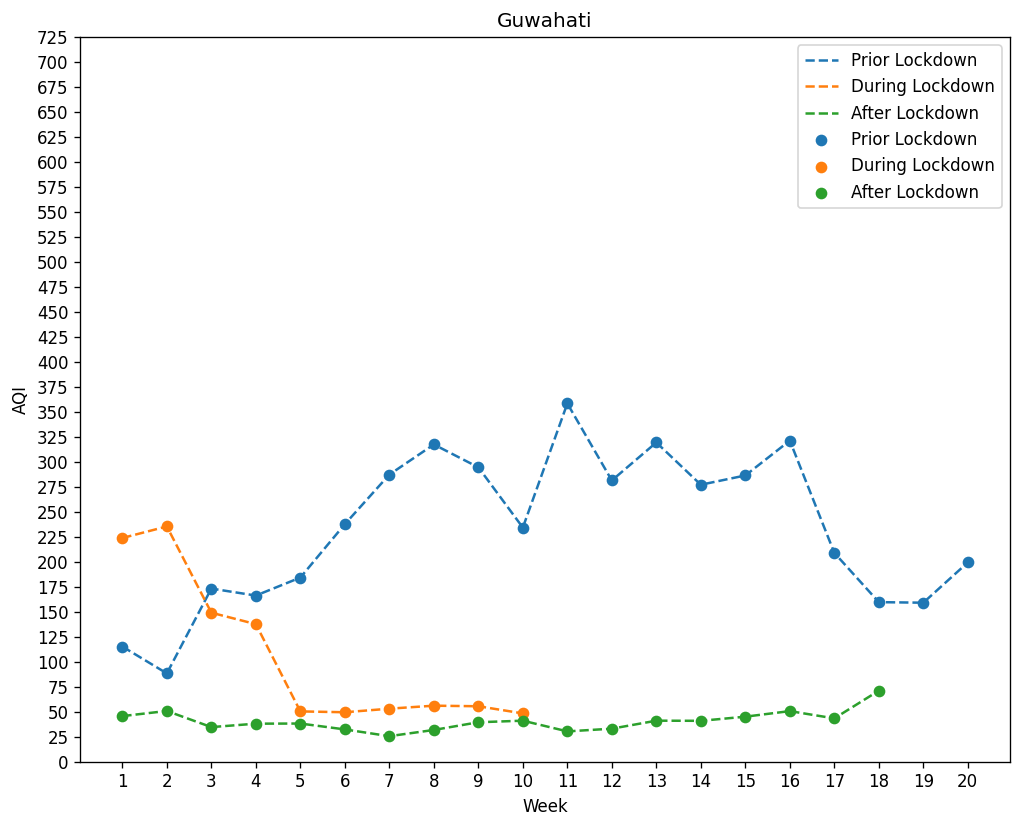

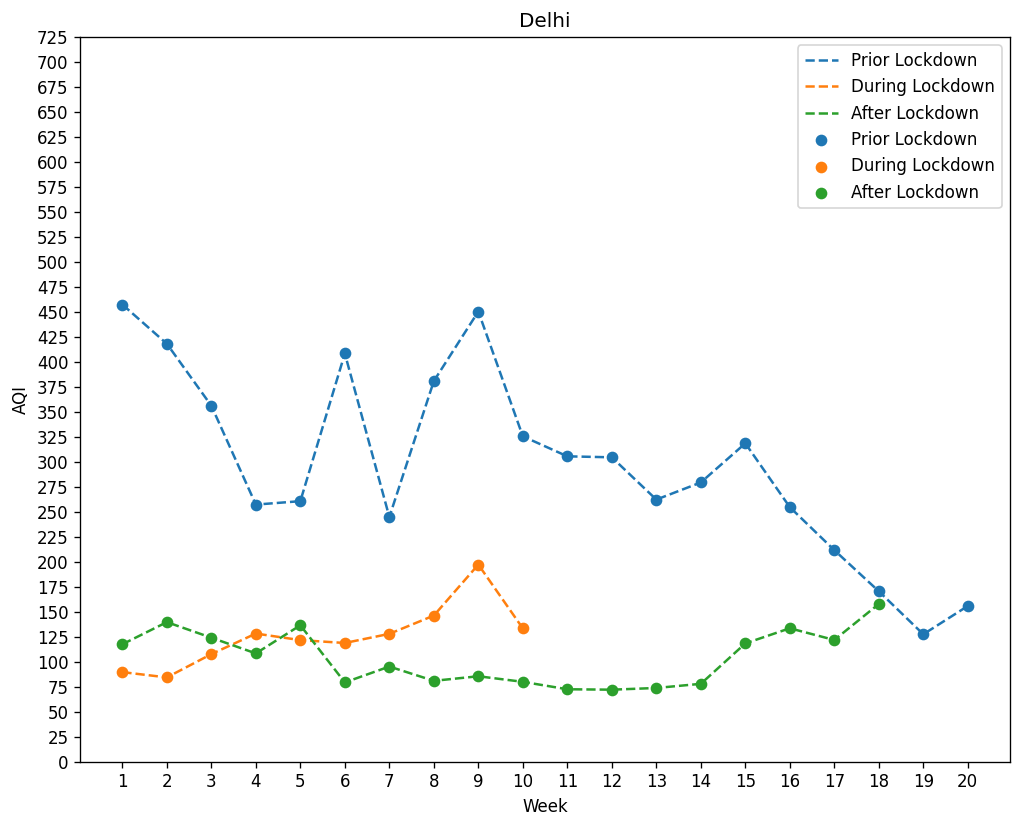

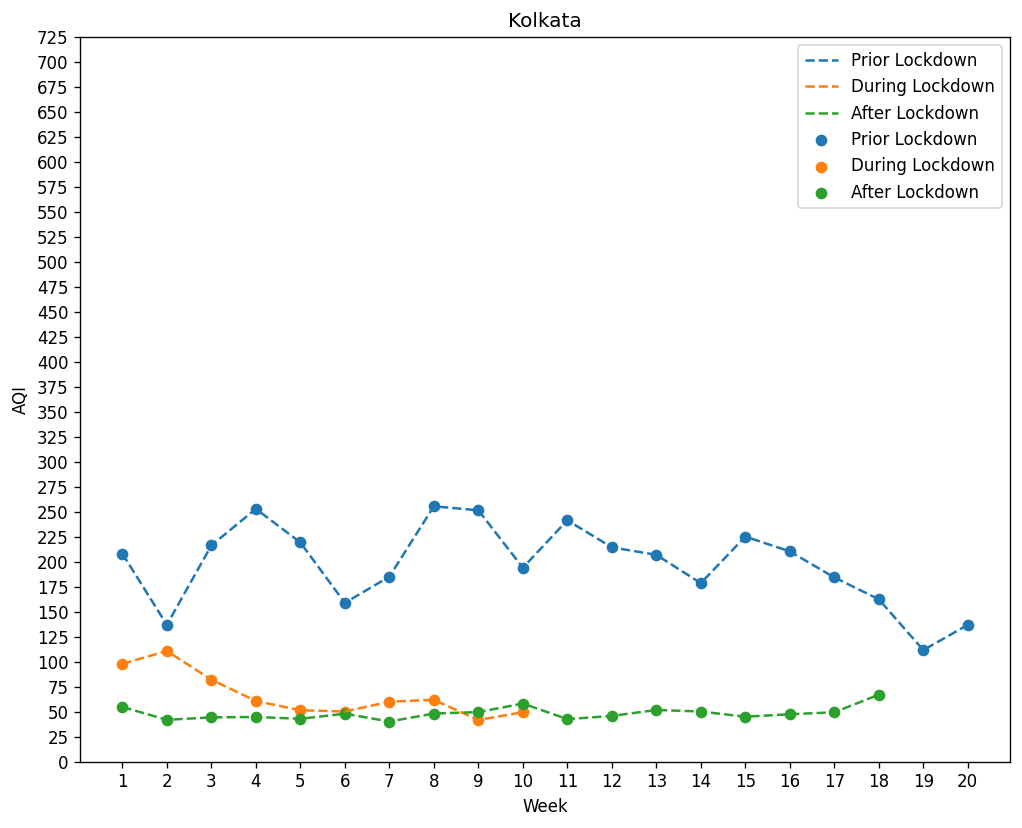

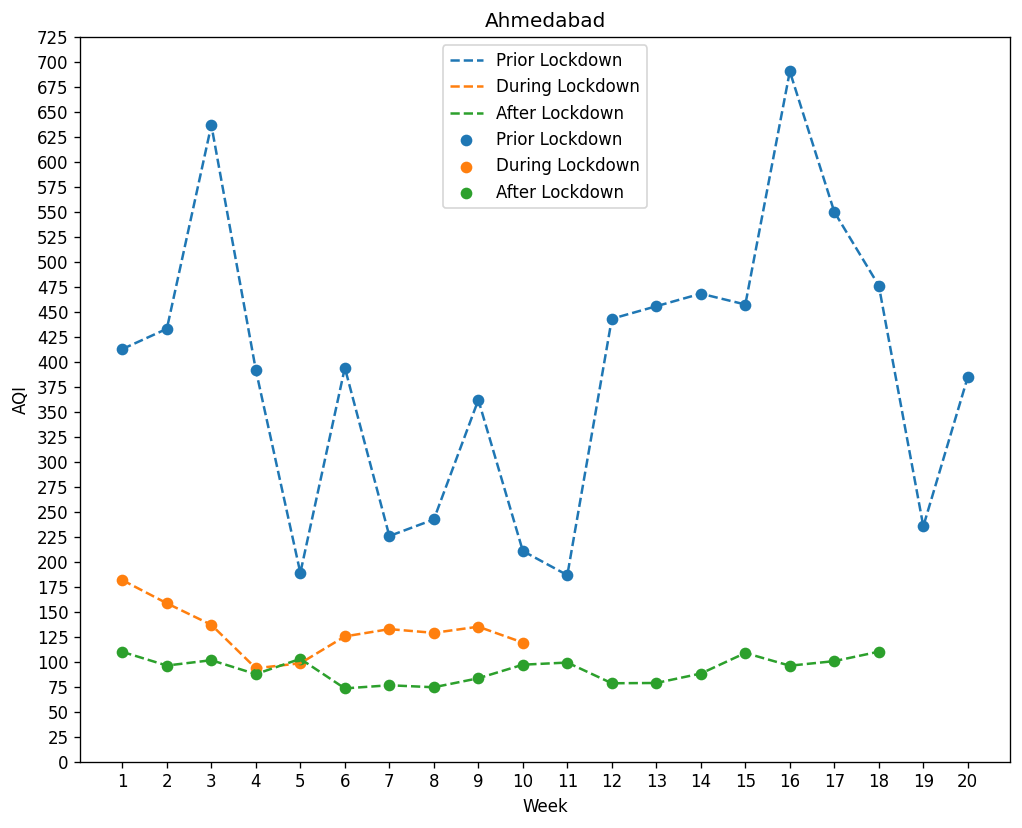

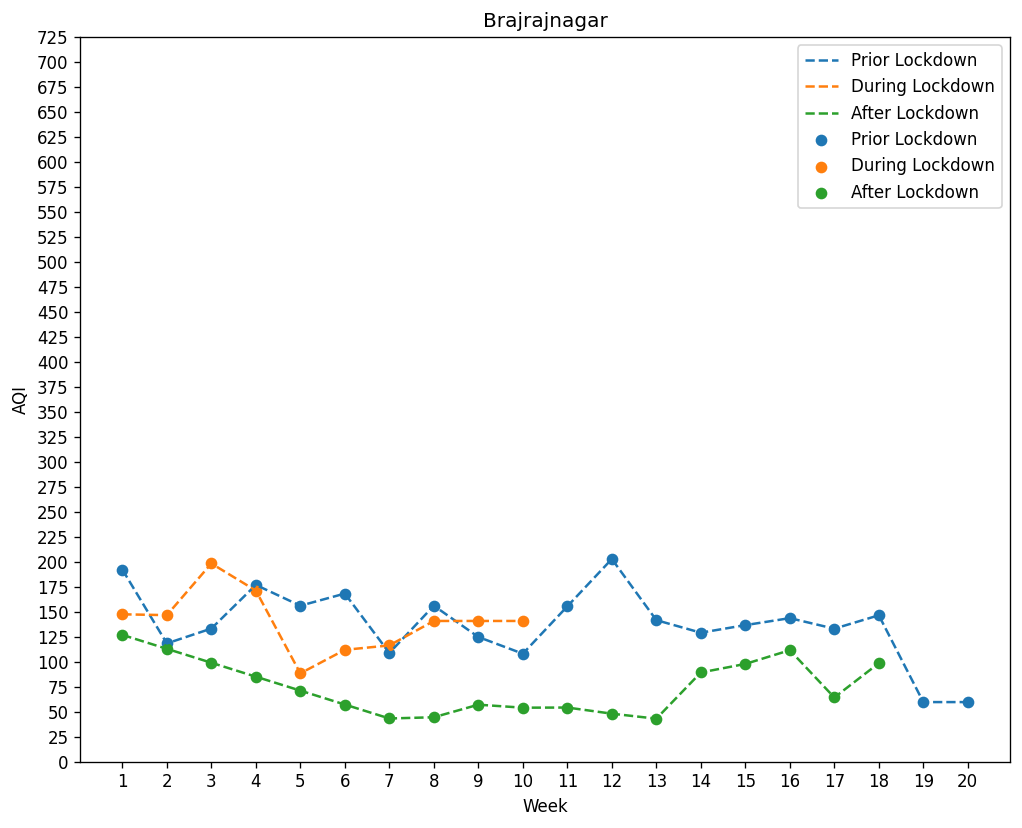

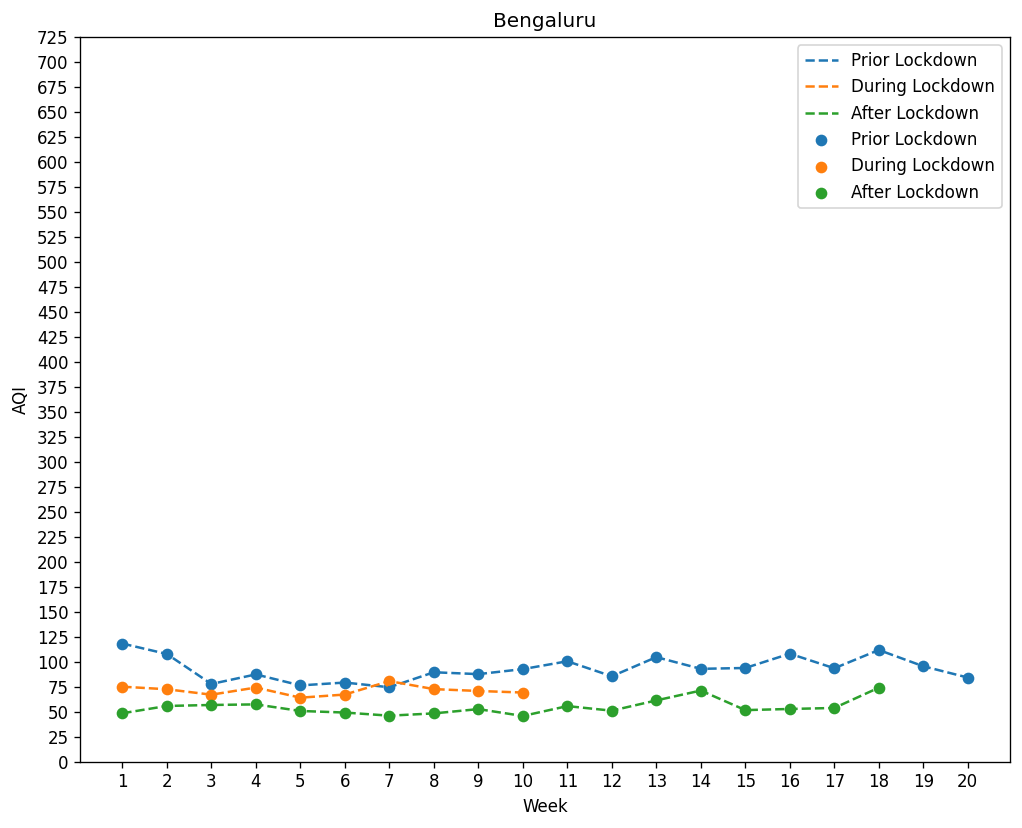

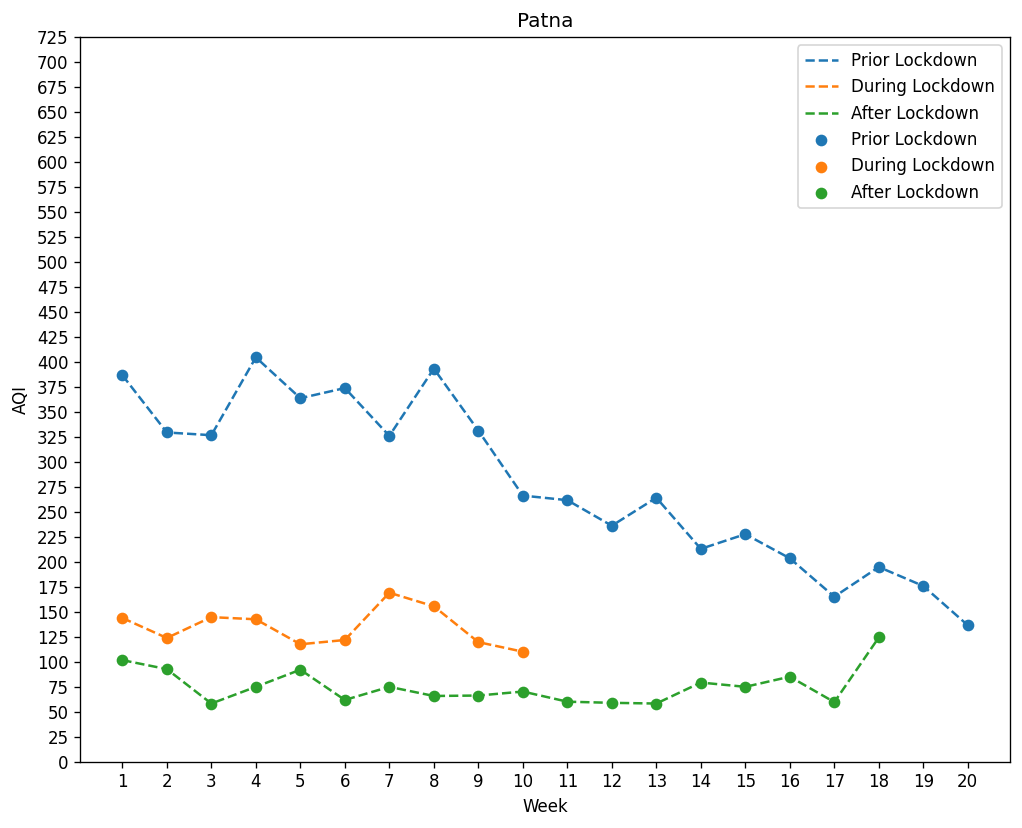

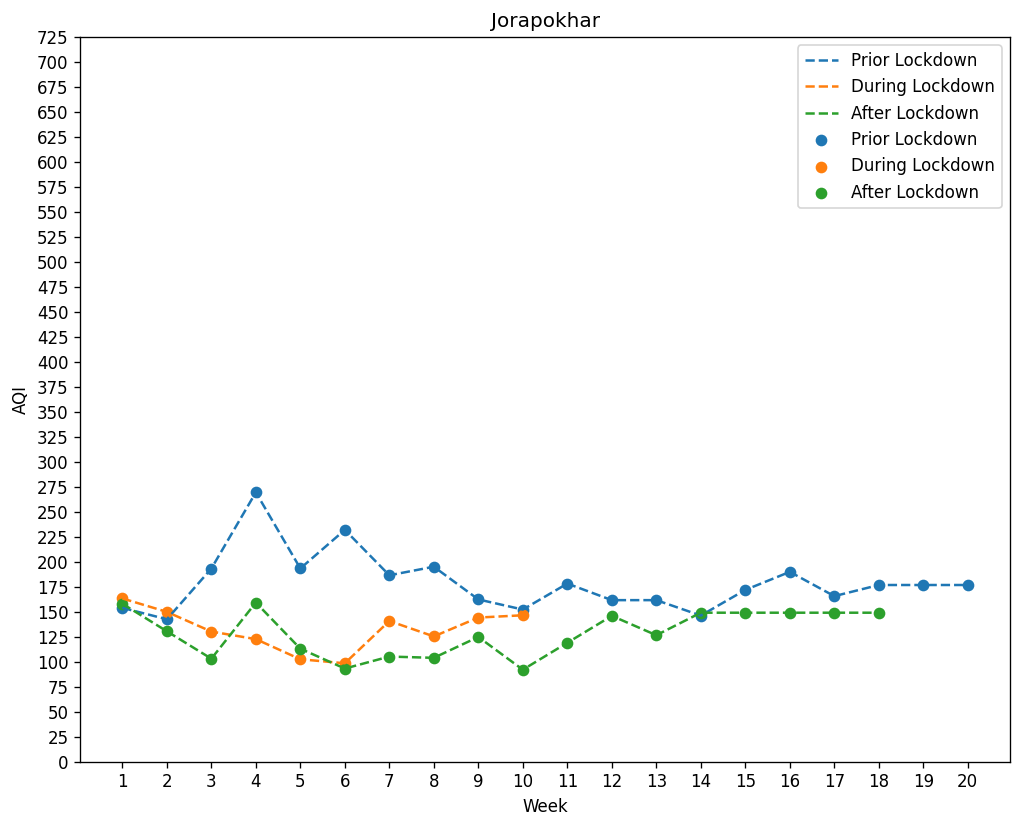

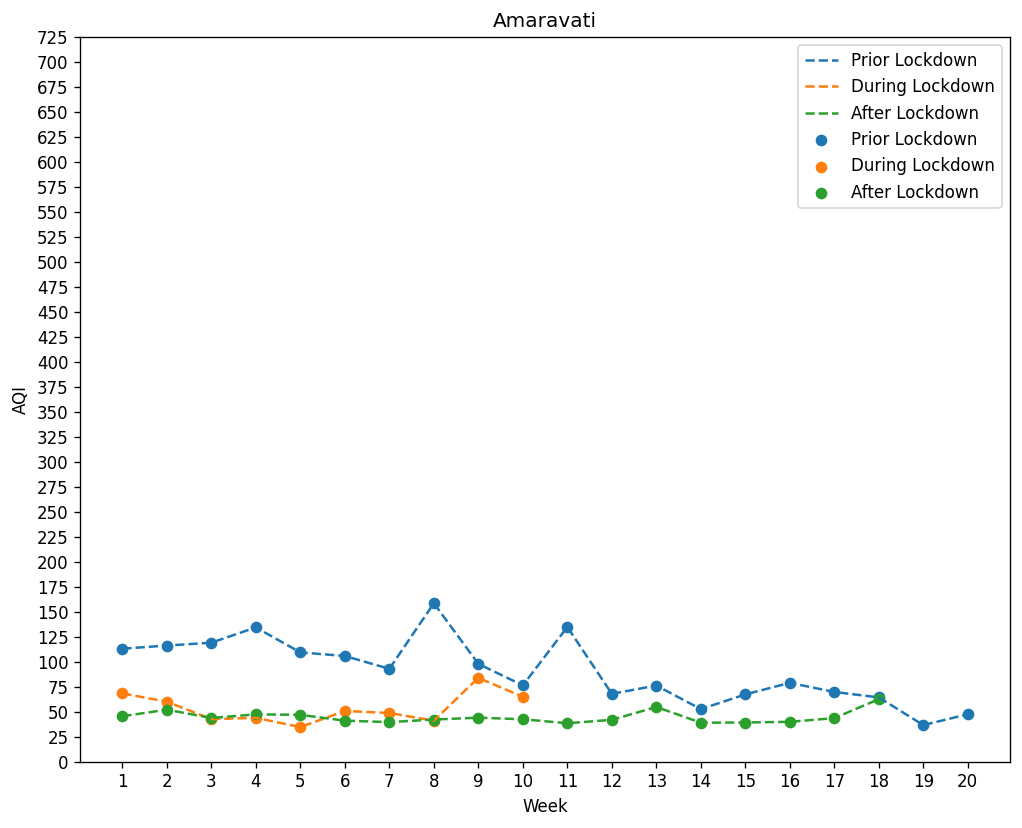

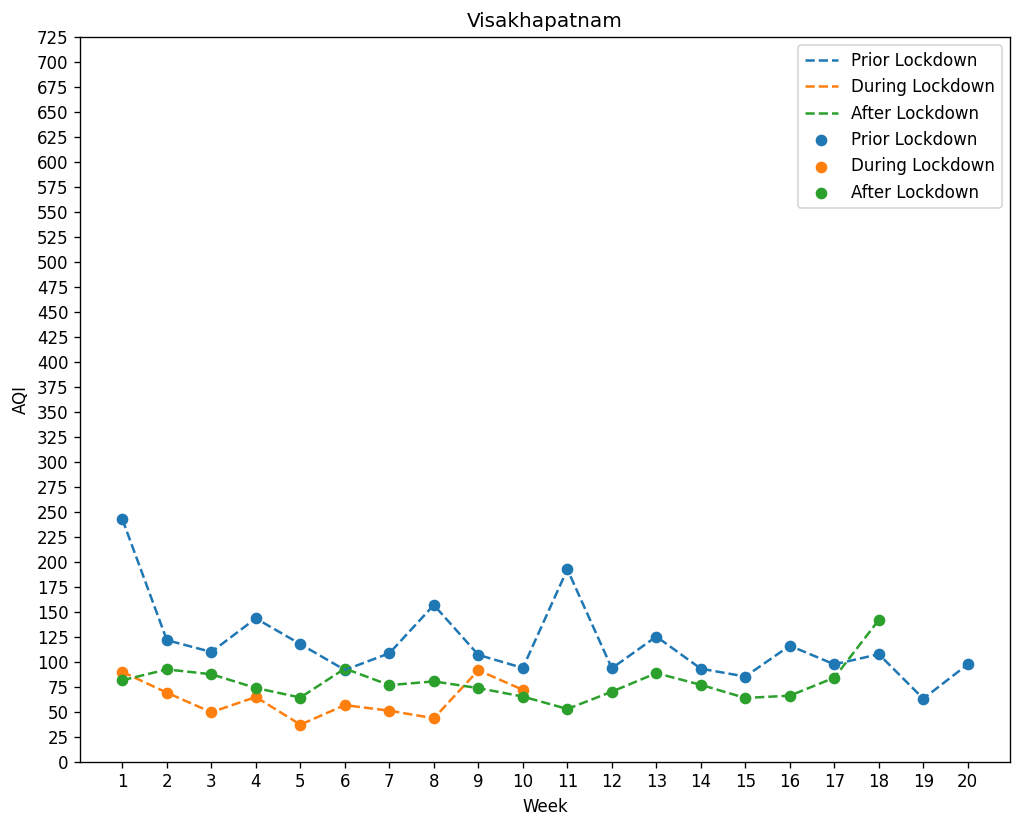

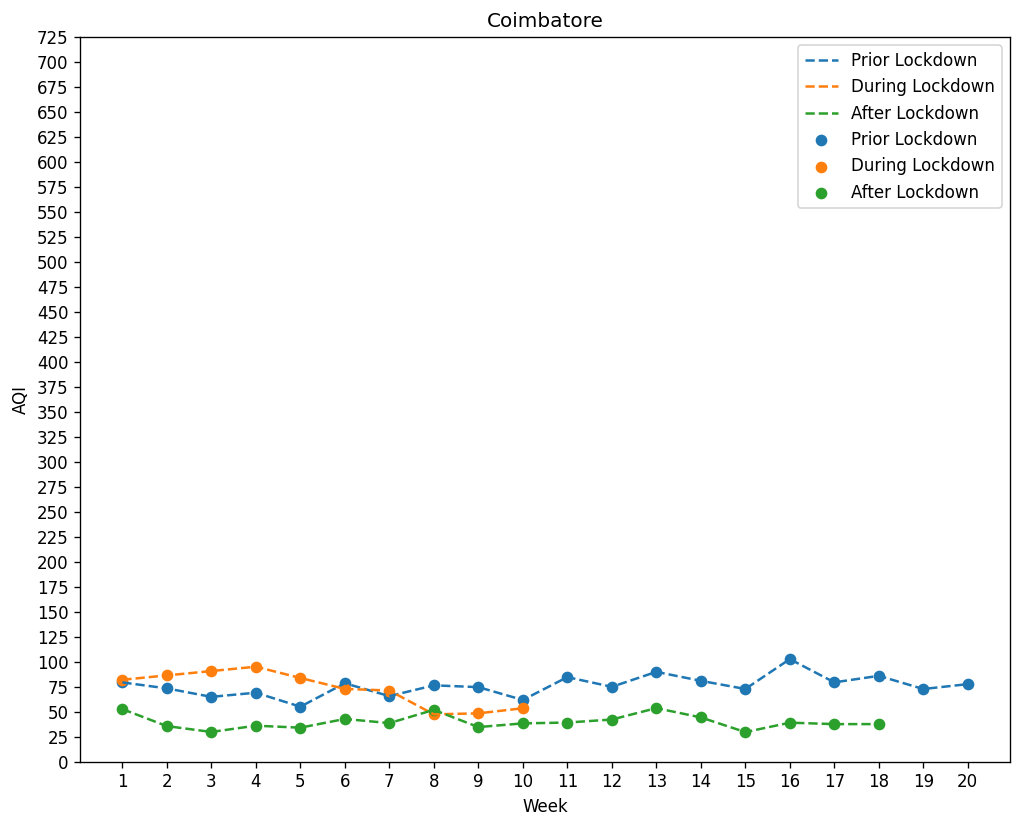

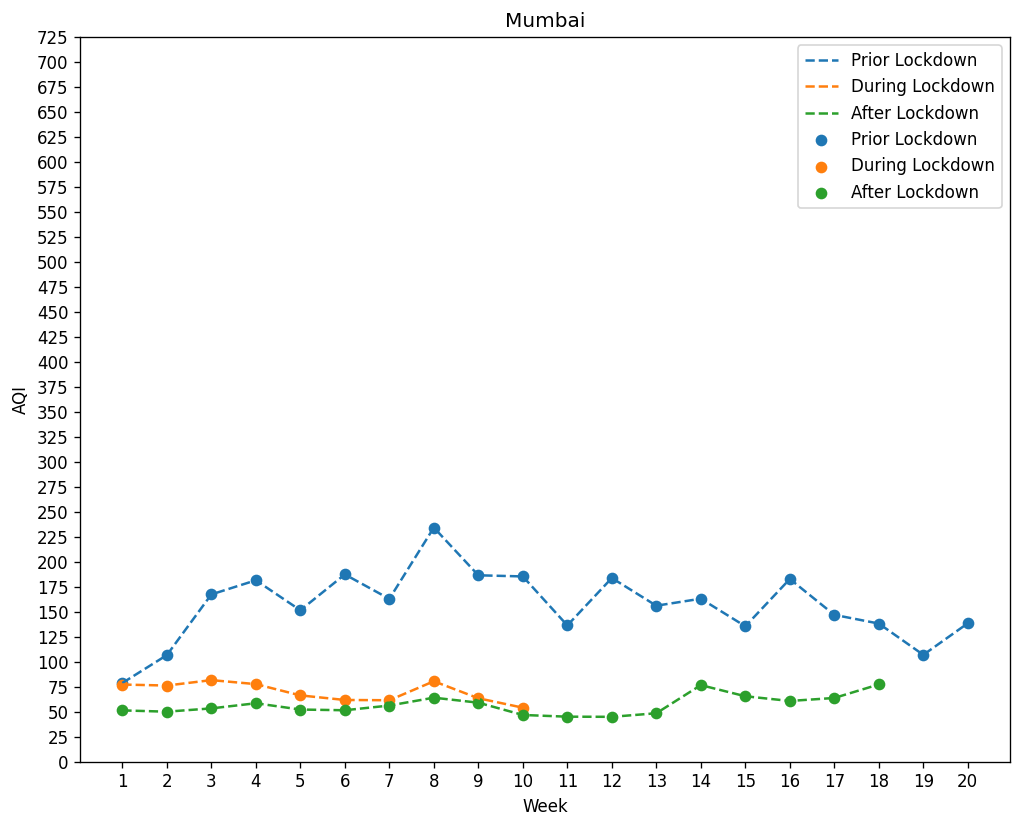

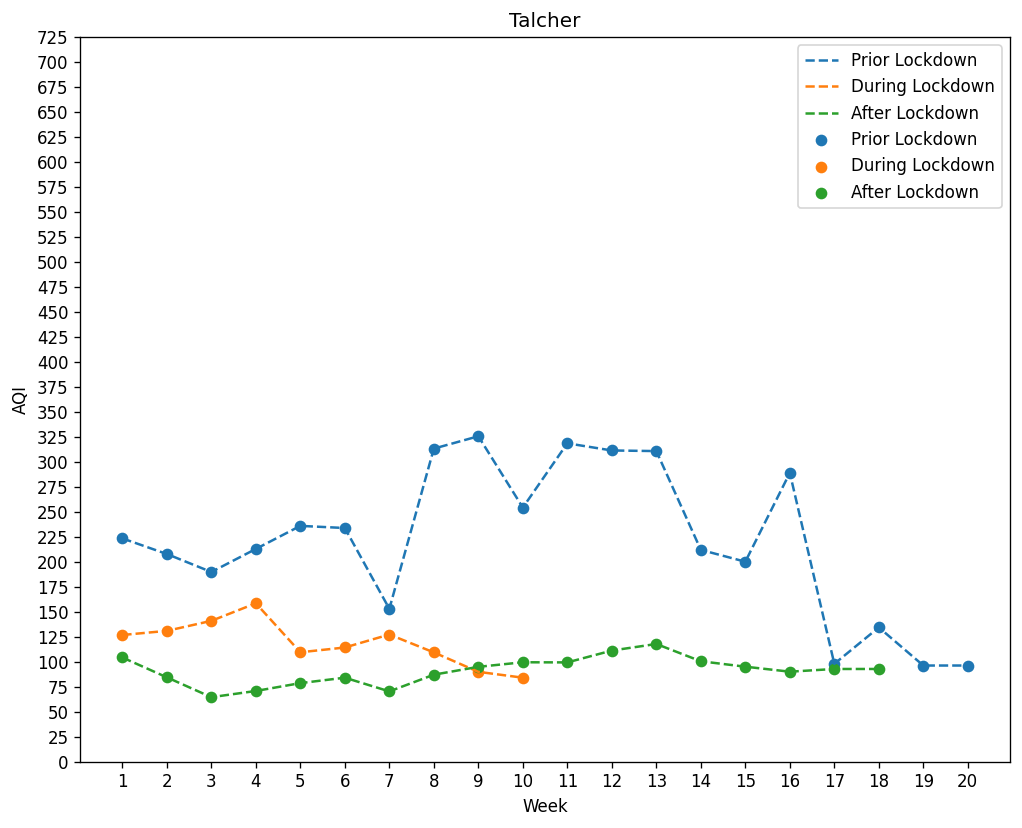

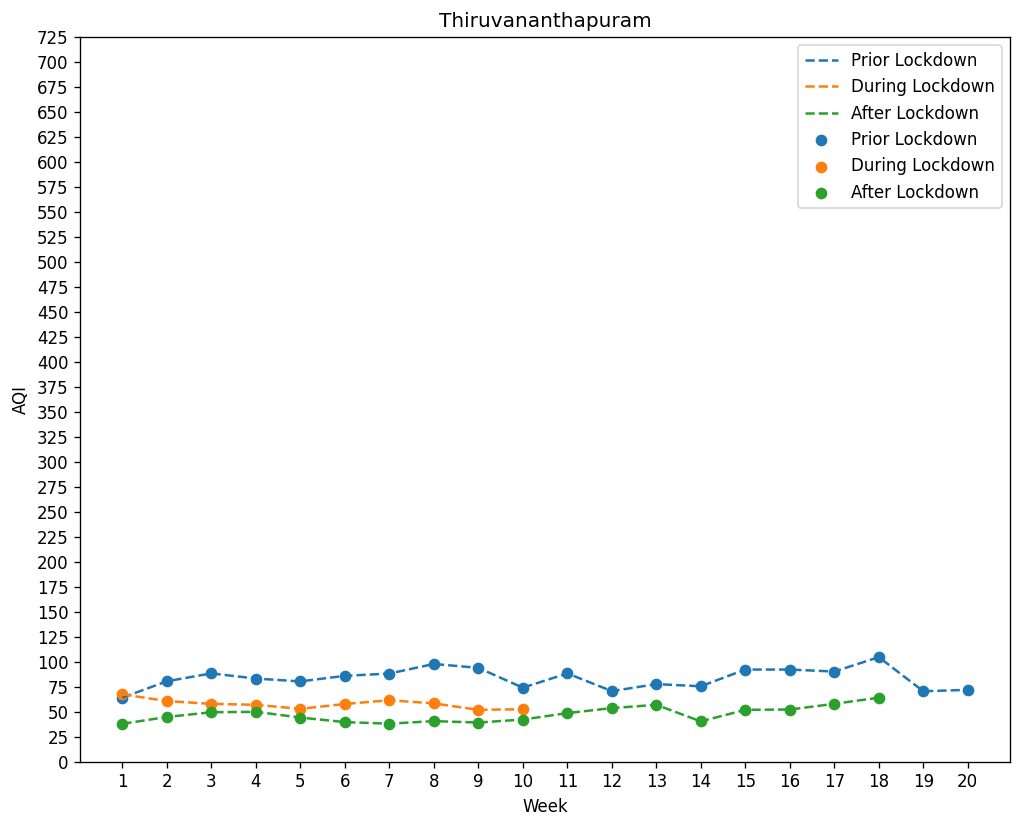

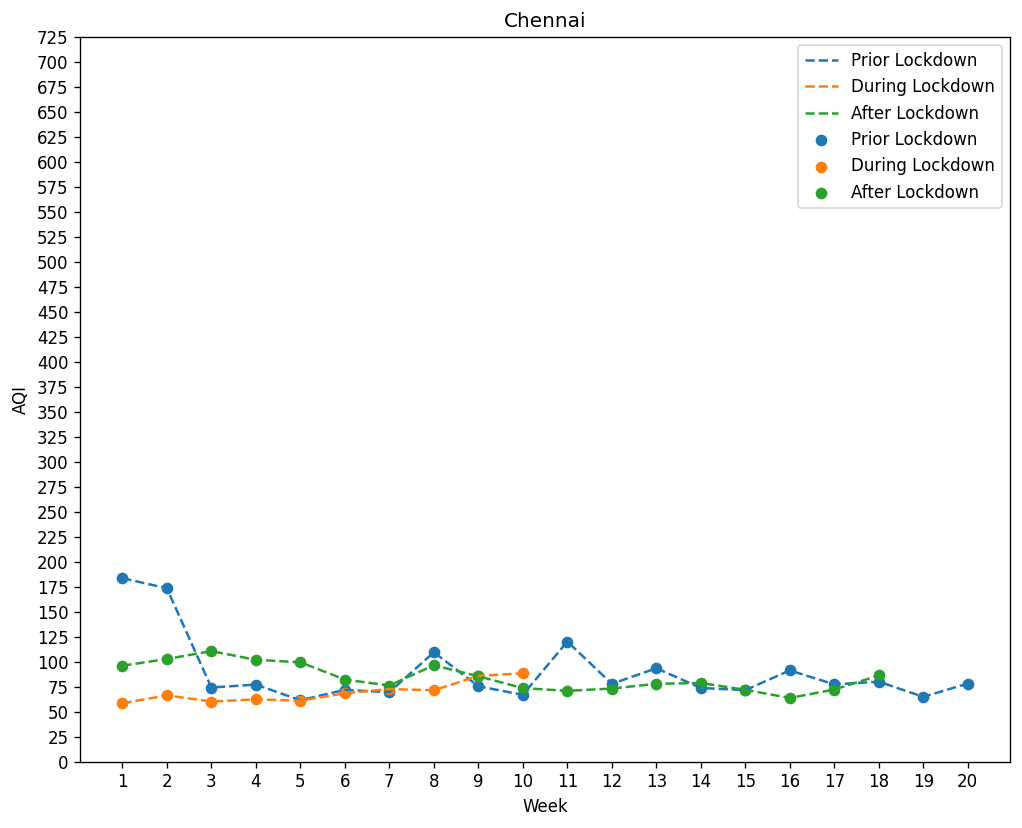

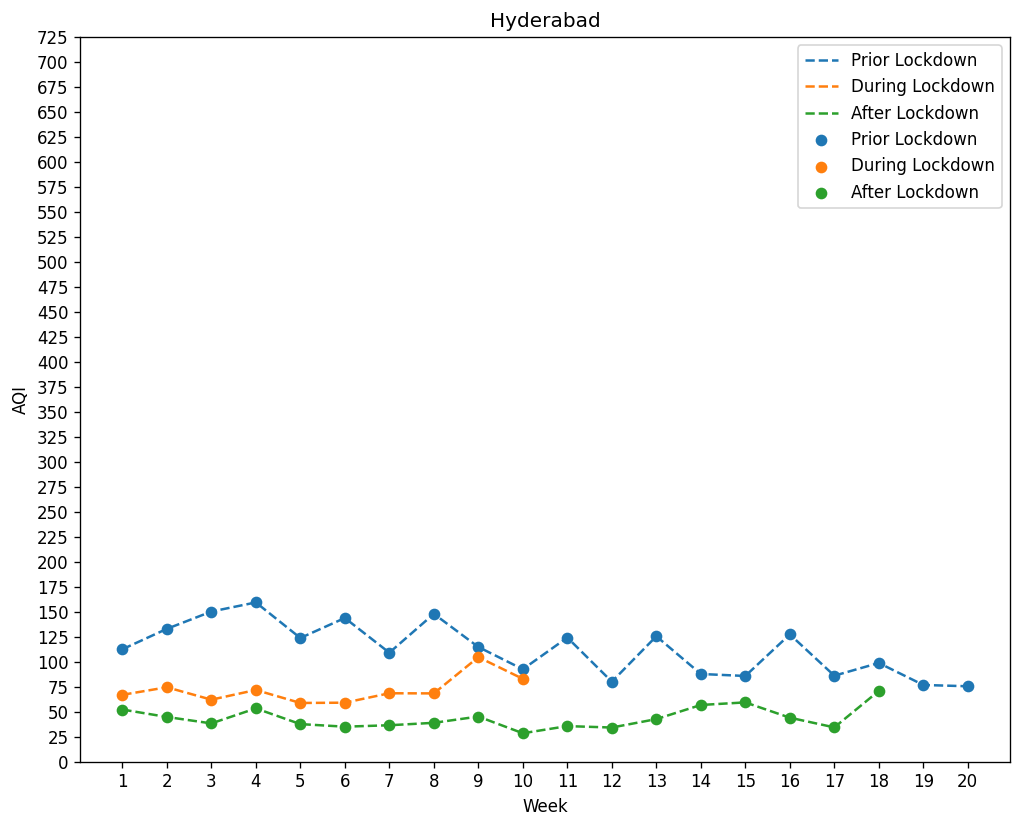

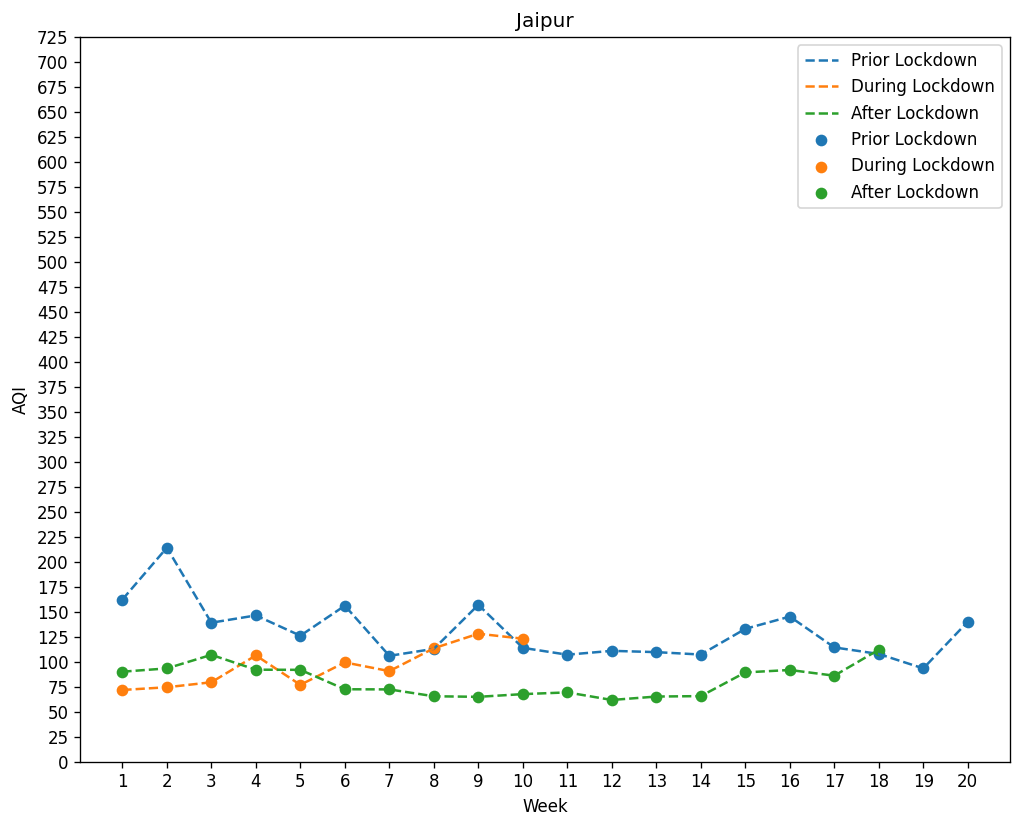

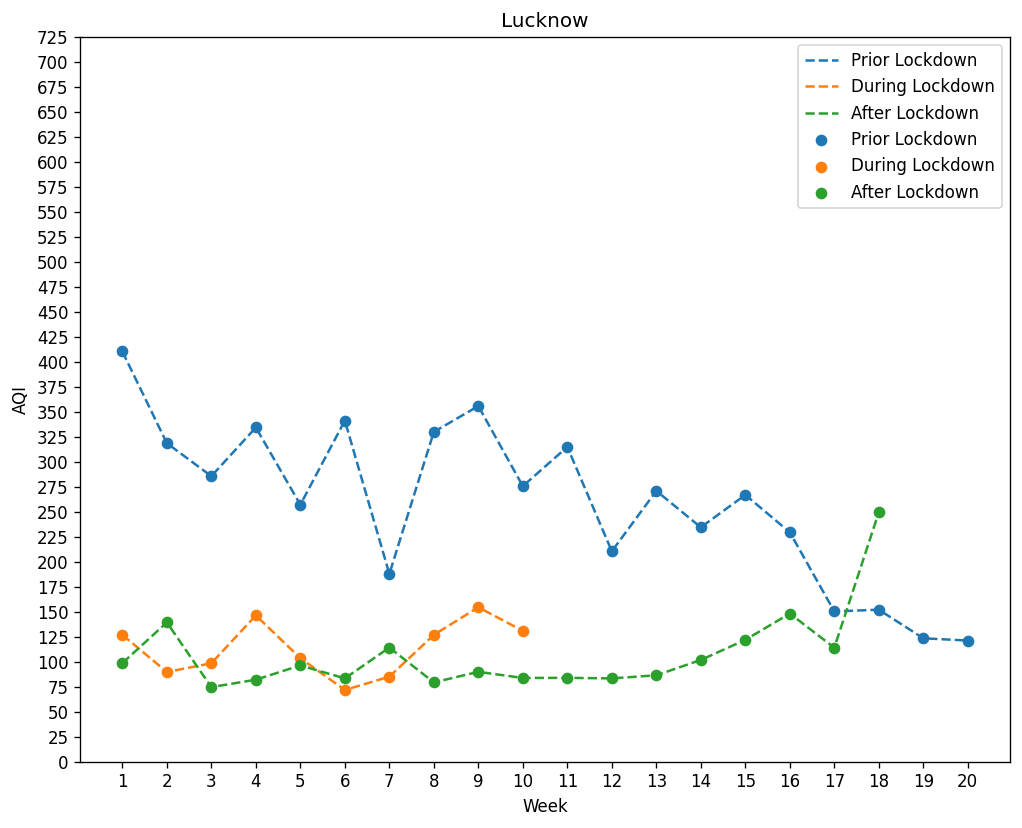

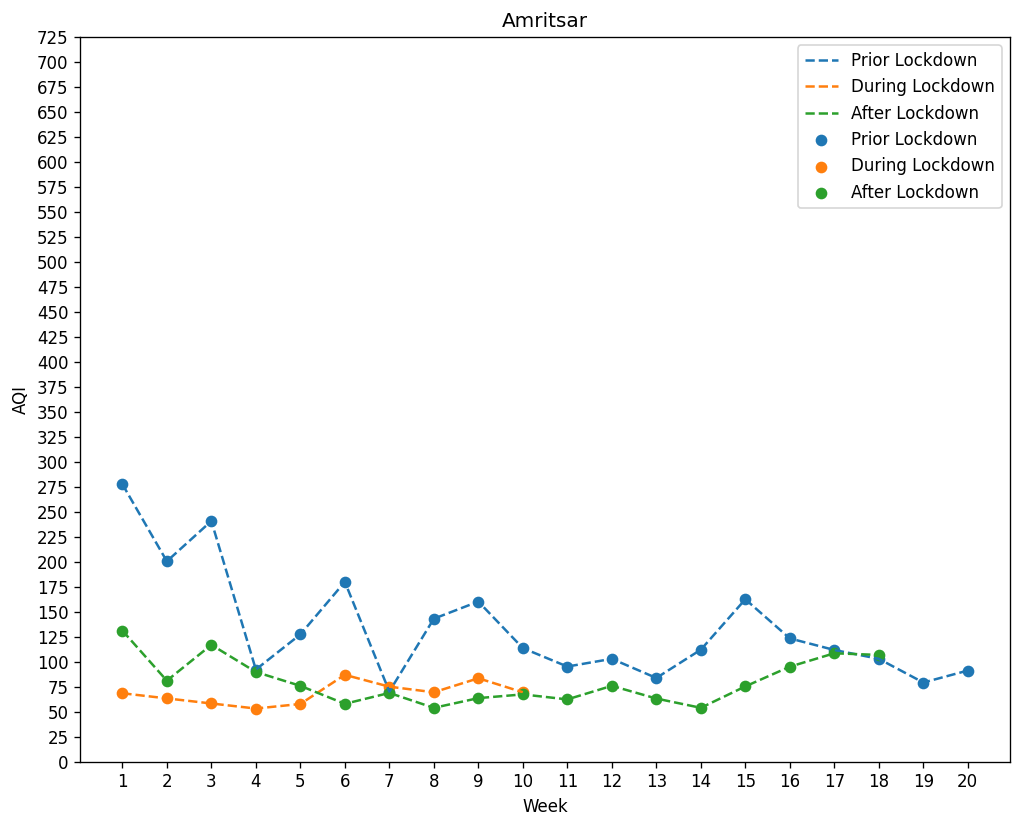

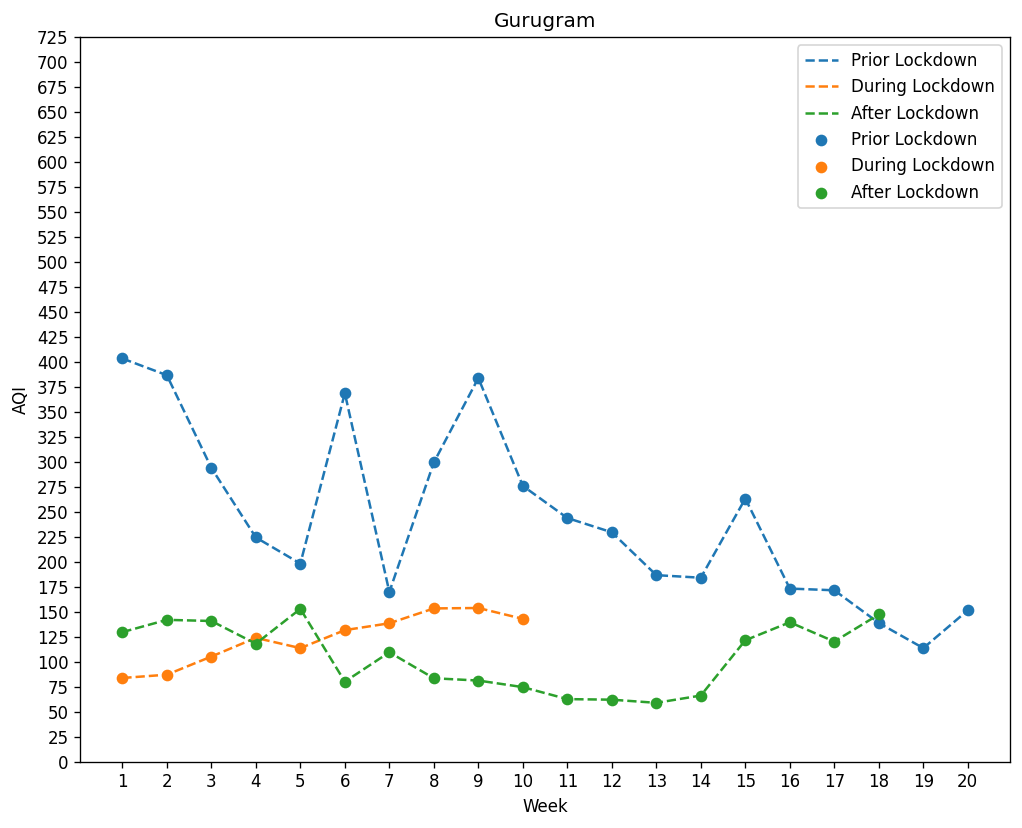

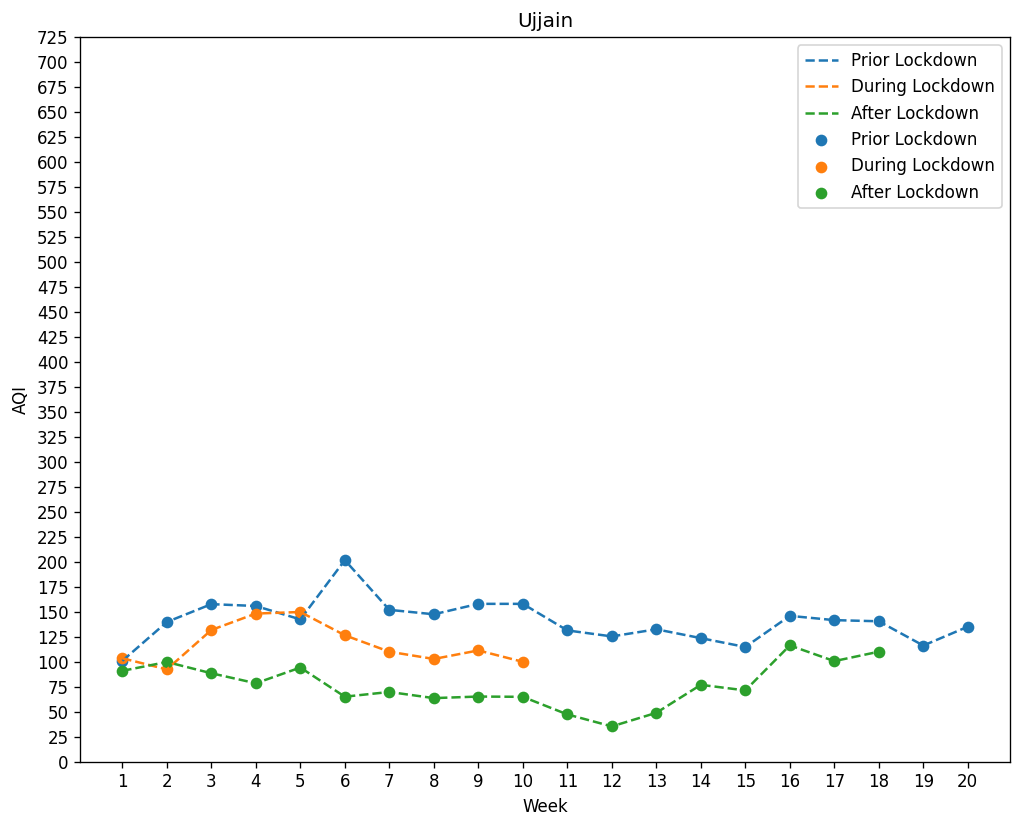

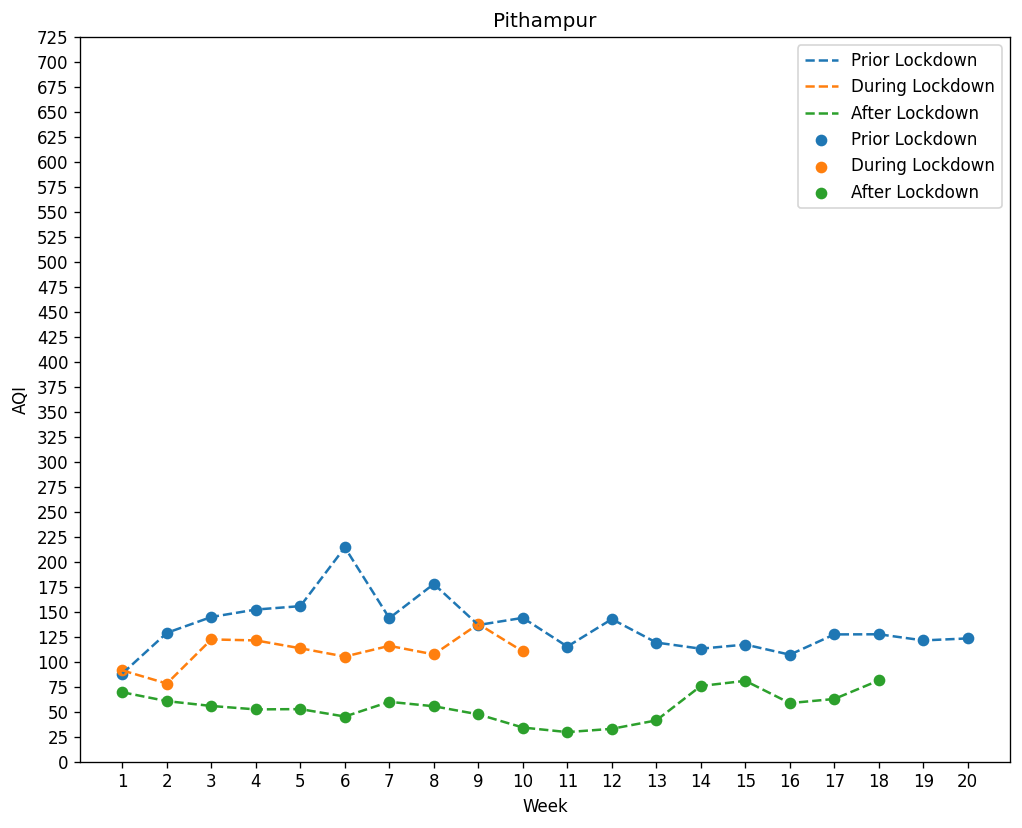

In [14]:
#Creating plots for the Aim2 week outputs
import matplotlib.pyplot as plt

list_cities =['Guwahati', 'Delhi', 'Kolkata','Ahmedabad','Brajrajnagar','Bengaluru',
               'Patna','Jorapokhar','Amaravati','Visakhapatnam','Coimbatore','Mumbai',
               'Talcher','Thiruvananthapuram','Chennai','Hyderabad','Jaipur','Lucknow',
               'Amritsar','Gurugram','Ujjain','Pithampur']

for i in list_cities:

  plt.figure(figsize=(10,8))
  plt.rcParams['figure.dpi'] = 120 # Adjusting figure size

  df = pd.read_csv('../aim2/output_week/{}_prior_lockdown.csv'.format(i),header=None)
  df1 = pd.read_csv('../aim2/output_week/{}_in_lockdown.csv'.format(i),header=None)
  df2 = pd.read_csv('../aim2/output_week/{}_after_lockdown.csv'.format(i),header=None)

  plt.scatter(df[0], df[1],label="Prior Lockdown")
  plt.plot(df[0], df[1], '--',label="Prior Lockdown") # plot the decision boundary
  plt.scatter(df1[0],df1[1],label = 'During Lockdown')
  plt.plot(df1[0],df1[1],'--',label = 'During Lockdown')
  plt.scatter(df2[0],df2[1],label='After Lockdown')
  plt.plot(df2[0],df2[1],'--',label='After Lockdown')

  plt.xticks(range(1,21,1))
  plt.yticks(range(0,750,25))
  plt.xlabel('Week')
  plt.ylabel('AQI')
  plt.title(i)

  plt.legend()
  plt.savefig('../aim2/Plots_week/{}.jpg'.format(i))
  plt.show()


**Aim5_output Code**

In [ ]:
#Creating file for each city containing AQI values from May,5 2020 and the corresponding Covid cases
import datetime
import json

list_cities =['Guwahati', 'Delhi', 'Kolkata','Ahmedabad','Brajrajnagar','Bengaluru',
               'Patna','Jorapokhar','Amaravati','Visakhapatnam','Coimbatore','Mumbai',
               'Talcher','Thiruvananthapuram','Chennai','Hyderabad','Jaipur','Lucknow',
               'Amritsar','Gurugram','Ujjain','Pithampur']

map_city = {'brajrajnagar':'jharsuguda','talcher':'angul','pithampur' : 'dhar'}
drop = set(['Guwahati','Jorapokhar','Amaravati'])

#Accessing the Covid-cases from the following file
f = open('../aim5/Aim5_Data/processed_data.json')
dict5 = json.load(f)
dict5 = {datetime.datetime.strptime(k,'%Y-%m-%d %H:%M:%S'): v for k, v in dict5.items()}
da = datetime.datetime(2020,5,5)

print(dict5[da])

for i in list_cities:

  name = i
  #Accessing the AQI values from following files
  temp1 = pd.read_csv('../aim2/output_week/{}_in_lockdown.csv'.format(i),header=None)
  temp2 = pd.read_csv('../aim2/output_week/{}_after_lockdown.csv'.format(i),header=None)


  if i in drop:
    continue
  
  i = i.lower()
  if i in map_city:
    i = map_city[i]
  
  if i =='bengaluru':
    i = ['bengaluru rural','bengaluru urban']
  else:
    i = [i]

  da =  datetime.datetime(2020,5,5)
  da1 = datetime.datetime(2020,6,1)
  temp1_val=6
  
  ans = []
  print(i)

  while da<da1:
    sum=0
    for j in range(7):#Taking sum of covid cases for a particualr week

      for val in i:
        if val in dict5[da]:
          sum+=dict5[da][val]
      
      da = da + datetime.timedelta(days=1)
    
    
    if temp1_val <= 9:
      ans.append([temp1[1][temp1_val],sum])
      temp1_val+=1
    else:
      break
  
  da = datetime.datetime(2020,6,1)
  da1 = datetime.datetime(2020,9,30)
  temp2_val=0

  while da<da1:
    sum=0
    for j in range(7):#Taking sum of covid cases for a particualr week

      for val in i:
        if val in dict5[da]:
          sum+=dict5[da][val]
      
      da = da + datetime.timedelta(days=1)
    
    ans.append([temp2[1][temp2_val],sum])
    temp2_val+=1
  
  check_temp = pd.DataFrame(ans,index=None,columns=['AQI','Cases'])
  check_temp.to_csv('../aim5/aim5_output/{}.csv'.format(name),index=None)#Generating the output file for aim5
  check_temp.plot.scatter(y='AQI',x='Cases',title=name)
  













In [ ]:
#creating the plots of aim5 files
import os
import pandas as pd

for r, d, f in os.walk('../aim5/aim5_output/'):
  for file in f:
    name = file.split('.')[0]
    df = pd.read_csv('../aim5/{}'.format(file))
    fig = df.plot.scatter(y='AQI',x='Cases',title=name)
    fig.figure.savefig('../aim5/Plots_5/{}.jpg'.format(name))
    fig.figure.show()

In [ ]:
df = pd.read_csv('../aim5/aim5_output/Patna.csv')
li = sorted(list(df['AQI']),reverse=True)
li1 = sorted(list(df['Cases']),reverse=True)

#df['rank1'] = df['AQI'].apply(lambda x:li.index(x))
#df['rank2'] = df['Cases'].apply(lambda x:li1.index(x))
df.corr('kendall')
df.corr('spearman')

,AQI,Cases
AQI,1.000000,-0.629525
Cases,-0.629525,1.000000
